In [1]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib notebook
from ipywidgets import *

from matplotlib.lines import Line2D

In [7]:
f = open("../test_data/1117/2021-11-17-15-25-20.txt", 'r')
# f = open("C:/BabyDeveloper-main/test_data/2021-11-17-15-25-20.txt", 'r')


data = []
frame = -1
odd_b = False
temp, x, y, z = [], [], [], []
odd_number = 5
for i in range(odd_number):
    x.append([])
    y.append([])
    z.append([])
temp_x, temp_y, temp_z = [], [], []
frame_num = -1

lines = f.readlines()
for line in lines:
    x_index = line.find(' x: ')
    y_index = line.find('y: ')
    z_index = line.find('z: ')
    temp_index = line.find('doppler: ')
    
    if (line.startswith('point_id: 0 ')) and odd_b and frame >= odd_number - 1 : # line이 'point_id: 0'으로 시작하고, 3 frame 단위라면
        for i in range(odd_number):
            temp_x.append(x[i]) # 임시 x값
            temp_y.append(y[i]) # 임시 y값
            temp_z.append(z[i]) # 임시 z값
        org_x = [item for sub_list in temp_x for item in sub_list] # x값 1차원화
        org_y = [item for sub_list in temp_y for item in sub_list] # y값 1차원화
        org_z = [item for sub_list in temp_z for item in sub_list] # z값 1차원화
        data.append([org_x, org_y, org_z])
        odd_b = False
        frame_num = frame_num % odd_number - 1
        x[frame_num] = []
        y[frame_num] = []
        z[frame_num] = []
        temp_x, temp_y, temp_z = [], [], []
    
    elif line.startswith('point_id: 0 '):
        frame += 1
        frame_num += 1
    
    if x_index != -1 : # x의 index가 -1이 아니라면
        x[frame_num].append(float(line[x_index + 3:y_index-1]))
        y[frame_num].append(float(line[y_index + 3:z_index-1]))
        z[frame_num].append(float(line[z_index + 3:temp_index-1]))
    
    if frame % odd_number == odd_number - 1: # 정해둔 frame 단위라면
        odd_b = True
    
f.close()

In [8]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

<IPython.core.display.Javascript object>


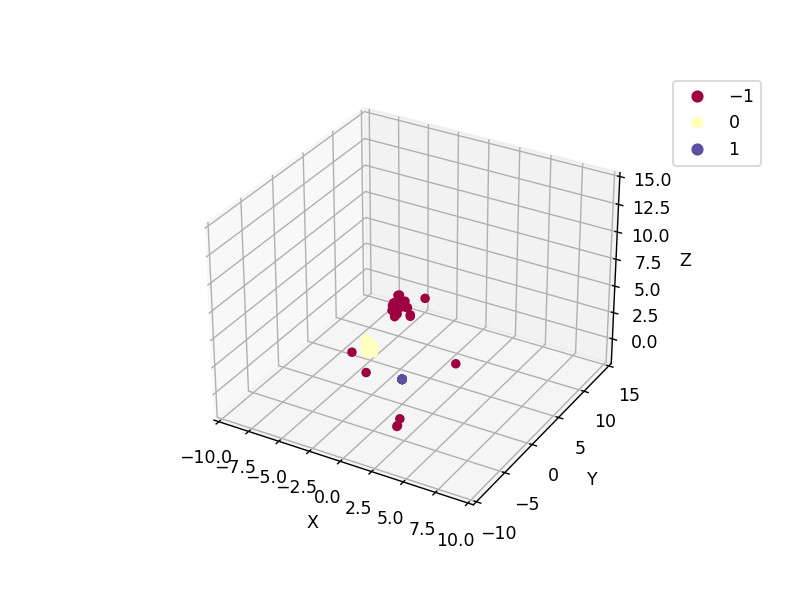

interactive(children=(IntSlider(value=131, description='i', max=393, min=-131), Output()), _dom_classes=('widg…

<function __main__.update(i=0)>

In [9]:
model = DBSCAN(eps=1.7,min_samples=20)

updateData = []

for i in range(len(data)) :
    pdData = pd.DataFrame({"x" : data[i][0], "y" : data[i][1], "z" : data[i][2]})

    # create model and prediction{{
    predict = pd.DataFrame(model.fit_predict(pdData))
    predict.columns=['predict']

    # concatenate labels to df as a new column
    r = pd.concat([pdData,predict],axis=1)
    
    updateData.append(r)
    
fig = plt.figure()
ax = Axes3D(fig)
    
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
cmap = plt.cm.Spectral

def update(i=0) :
    ax = plt.axes(projection='3d')
#     ax.view_init(90, 0)
    ax.view_init(30, 120)
    ax.set_xlim(10, -10)
    ax.set_ylim(15, -10)
    ax.set_zlim(-2, 15)
    
    sc = ax.scatter(updateData[i]["x"], updateData[i]["y"], updateData[i]["z"], c=updateData[i]["predict"], marker='o', cmap=cmap, alpha=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # legend
    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
    
    
     
interact(update, i = len(data) // 3)